In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#Importation des modules nécessaires 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


def test_statio(serie):
    
    # Statistiques mobiles
    rolling_mean = serie.rolling(window=12).mean()
    rolling_std = serie.rolling(window=12).std()
    
    #Tracé statistiques mobiles
    original = plt.plot(serie, color='blue', label='Valeurs initiales')
    mean = plt.plot(rolling_mean, color='red', label='Moyenne Mobile')
    std = plt.plot(rolling_std, color='black', label='Ecart-type Mobile')
    plt.legend(loc='best')
    plt.title('Moyenne et écart-type Mobiles')
    plt.show(block=False)
    
    #Test de Dickey–Fuller :
    result = adfuller(serie['PAX'])
    print('Statistiques ADF : {}'.format(result[0]))
    print('p-value : {}'.format(result[1]))
    print('Valeurs Critiques :')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

In [2]:
#df = pd.read_csv("/Users/victorhuynh/Downloads/database_sieges.csv", parse_dates = ['Date'])
#df1 = df[['Date','PAX']]
#df1 = df.groupby('Date').agg({'PAX':'mean'}).reset_index()
#df1 = df1[~df1['Date'].isin([pd.to_datetime('2010-04-18'),pd.to_datetime('2010-04-19')])]

In [3]:
df = pd.read_csv("/Users/victorhuynh/Downloads/database_sieges.csv", parse_dates = ['Date'], index_col = ['Date'])
df1 = df[['PAX']] #On ne garde que la variable PAX
df1 = df1.groupby('Date').agg({'PAX':'mean'})
df1 = df1.drop([pd.to_datetime('2010-04-18'),pd.to_datetime('2010-04-19')])

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
pourcent_train = 0.70
point_sep = round(len(df1) * pourcent_train)
train, test = df1.iloc[:point_sep], df1.iloc[point_sep:]
train = np.log(train)
train_diff = train.diff(periods = 1).dropna()

In [18]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_diff, nlags = 40)
lag_pacf = pacf(train_diff, nlags = 40)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Auto-corrélation')

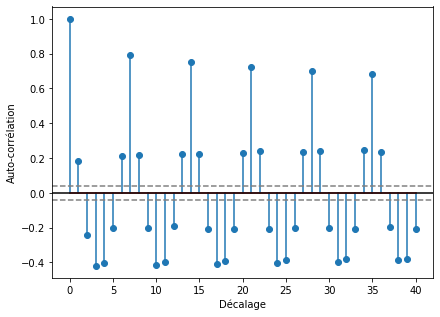

In [19]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y = 0, linestyle = '-', color = 'black')
plt.axhline(y = -1.96/np.sqrt(len(train)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(train)), linestyle = '--', color = 'gray')
plt.xlabel('Décalage')
plt.ylabel('Auto-corrélation')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Auto-corrélation partielle')

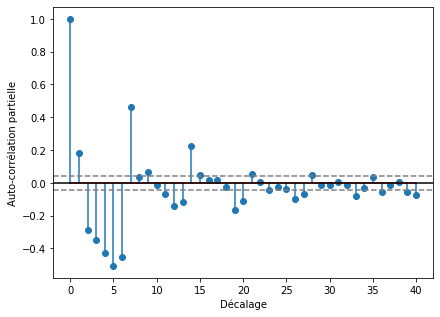

In [20]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '-', color = 'black')
plt.axhline(y = -1.96/np.sqrt(len(train)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(train)), linestyle = '--', color = 'gray')
plt.xlabel('Décalage')
plt.ylabel('Auto-corrélation partielle')

In [15]:
!pip install pmdarima 
from pmdarima import auto_arima

In [26]:
stepwise_fit = auto_arima(train['PAX'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=11.64 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-1366.084, Time=0.40 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-2649.601, Time=3.51 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=9.01 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-1368.012, Time=0.22 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-2302.201, Time=0.37 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-3856.361, Time=9.69 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=39.97 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=13.37 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-3003.054, Time=7.92 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-3922.714, Time=25.18 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=-3631.043, Time=6.87 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=38.28 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=14.44 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 2300
Model:             SARIMAX(2, 0, 3)x(2, 1, [1], 12)   Log Likelihood                2490.453
Date:                              Sun, 21 Mar 2021   AIC                          -4960.906
Time:                                      22:29:53   BIC                          -4903.551
Sample:                                           0   HQIC                         -4939.989
                                             - 2300                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0001      0.001     -0.194      0.846      -0.001       0.001
ar.L1          1.2173      0.006    209.189      0.000       1.206       1.229
ar.L2         -0.9889      0.005   -180.528      0.000      -1.000      -0.978
ma.L1         -0.5572      0.020    -27.338      0.000      -0.597      -0.517
ma.L2          0.5025      0.021     24.177      0.000       0.462       0.543
ma.L3          0.4321      0.020     21.413      0.000       0.393       0.472
ar.S.L12       0.0974      0.035      2.761      0.006       0.028       0.166
ar.S.L24       0.0302      0.030      1.004      0.316      -0.029       0.089
ma.S.L12      -0.7857      0.030    -25.782      0.000      -0.845      -0.726
sigma2         0.0065      0.000     34.238      0.000       0.006       0.007
===================================================================================
Ljung-Box (L1) (Q):                  20.53   Jarque-Bera (JB):                15.70
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
model = SARIMAX(train, order = (3,0,2), seasonal_order = (1,1,0,12))
model_fit = model.fit(disp = False)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible st

In [85]:
K = len(test)
prediction = model_fit.forecast(K)
prediction = np.exp(prediction)
index_dates = pd.date_range(start='2014-04-22',end='2016-12-31')
prediction.index = index_dates

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


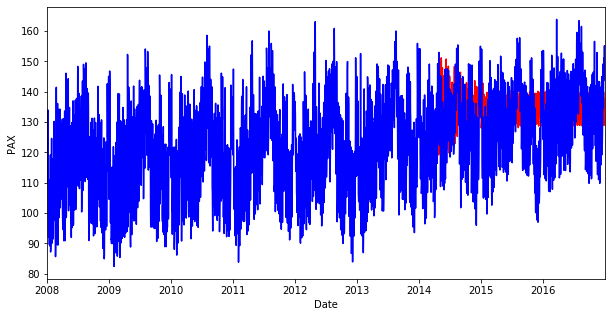

In [25]:
plt.figure(figsize = (10, 5))
plt.plot(prediction,'r')
plt.plot(df1,'b')
#plt.title('RMSE : %.2f'% np.sqrt(sum(prediction-test)**2)/len(test))
plt.xlabel('Date')
plt.ylabel('PAX')
plt.autoscale(enable = True, axis = 'x', tight = True)

# Tentative sans log 

In [6]:
df = pd.read_csv("/Users/victorhuynh/Downloads/database_sieges.csv", parse_dates = ['Date'], index_col = ['Date'])
df1 = df[['PAX']] #On ne garde que la variable PAX
df1 = df1.groupby('Date').agg({'PAX':'mean'})
df1 = df1.drop([pd.to_datetime('2010-04-18'),pd.to_datetime('2010-04-19')])

pourcent_train = 0.70
point_sep = round(len(df1) * pourcent_train)
train, test = df1.iloc[:point_sep], df1.iloc[point_sep:]
train_diff = train.diff(periods = 1).dropna()

model = SARIMAX(train, order = (2,0,3), seasonal_order = (2,1,1,12))
model_fit = model.fit(disp = False)

K = len(test)
prediction = model_fit.forecast(K)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
index_dates = pd.date_range(start='2014-04-22',end='2016-12-31')
prediction.index = index_dates

plt.figure(figsize = (10, 5))
plt.plot(prediction,'r')
plt.plot(df1,'b')
#plt.title('RMSE : %.2f'% np.sqrt(sum(prediction-test)**2)/len(test))
plt.xlabel('Date')
plt.ylabel('PAX')
plt.autoscale(enable = True, axis = 'x', tight = True)

In [5]:
model_fit

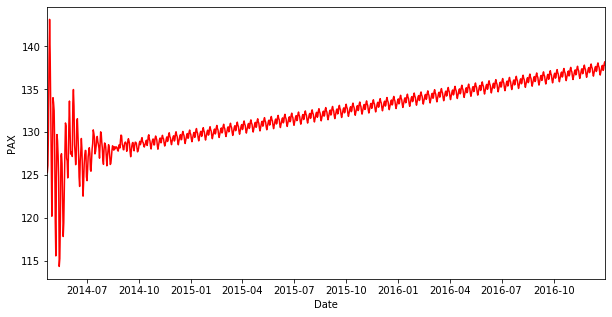

In [31]:
plt.figure(figsize = (10, 5))
plt.plot(prediction,'r')
#plt.plot(df1,'b')
#plt.title('RMSE : %.2f'% np.sqrt(sum(prediction-test)**2)/len(test))
plt.xlabel('Date')
plt.ylabel('PAX')
plt.autoscale(enable = True, axis = 'x', tight = True)

# Test 

In [17]:
smodel = auto_arima(train['PAX'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=8.48 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=20450.073, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=19179.249, Time=1.93 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=4.74 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=20448.144, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=19553.003, Time=0.34 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=18042.743, Time=7.57 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=30.83 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=10.58 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=18864.353, Time=8.66 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=17970.166, Time=14.22 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=18251.845, Time=2.85 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=37.46 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=11.03 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 2300
Model:             SARIMAX(3, 0, 2)x(1, 1, [], 12)   Log Likelihood               -8488.543
Date:                             Mon, 22 Mar 2021   AIC                          16993.085
Time:                                     16:04:57   BIC                          17038.969
Sample:                                          0   HQIC                         17009.818
                                            - 2300                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0552      0.130      0.426      0.670      -0.199       0.310
ar.L1          2.0336      0.015    137.038      0.000       2.004       2.063
ar.L2         -1.9692      0.019   -105.894      0.000      -2.006      -1.933
ar.L3          0.7831      0.015     53.623      0.000       0.755       0.812
ma.L1         -1.3071      0.010   -135.902      0.000      -1.326      -1.288
ma.L2          0.9085      0.010     94.702      0.000       0.890       0.927
ar.S.L12      -0.6272      0.017    -37.005      0.000      -0.660      -0.594
sigma2        97.0217      2.693     36.026      0.000      91.743     102.300
===================================================================================
Ljung-Box (L1) (Q):                  61.20   Jarque-Bera (JB):                13.07
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
prediction, se, conf = model_fit.forecast(len(test), alpha=0.05)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: too many values to unpack (expected 3)

In [39]:
test.index

DatetimeIndex(['2014-04-22', '2014-04-23', '2014-04-24', '2014-04-25',
               '2014-04-26', '2014-04-27', '2014-04-28', '2014-04-29',
               '2014-04-30', '2014-05-01',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=985, freq=None)

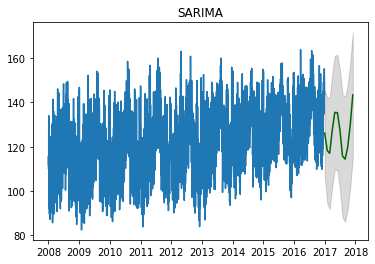

In [41]:
# Forecast
n_periods = 12
fitted, confint = smodel.predict(n_periods = n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df1.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df1)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA")
plt.show()

# TEST 2 :

In [68]:
model = SARIMAX(df1, order = (2,0,3), seasonal_order = (2,1,1,12))
model_fit = model.fit(disp = False)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


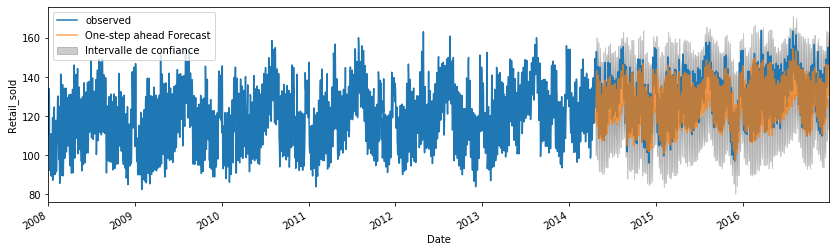

In [84]:
model = SARIMAX(df1, order = (2,0,3), seasonal_order = (2,1,1,12))
model_fit = model.fit(disp =-1)

prediction = model_fit.get_prediction(start=pd.to_datetime('2014-04-22'), dynamic=False)
inter_conf = prediction.conf_int()
sup_conf = pd.Series(inter_conf['upper PAX'])
inf_conf = pd.Series(inter_conf['lower PAX'])

ax = df1['PAX'].plot(label='Réalisé')
prediction.predicted_mean.plot(ax=ax, label='Prédiction', alpha=.7, figsize=(14, 4))
ax.fill_between(inter_conf.index,
                sup_conf,
                inf_conf, color='k', alpha=.2, label = 'Intervalle de confiance')
ax.set_xlabel('Date')
ax.set_ylabel('PAX')
plt.legend()
plt.show()

In [134]:
prediction_futur = model_fit.get_forecast(steps = 365)

prediction_futur

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


2016-12-31    133.315697
2017-01-01    124.760192
2017-01-02    123.536425
2017-01-03    129.257344
2017-01-04    135.739302
                 ...    
2017-12-26    129.647944
2017-12-27    129.405349
2017-12-28    129.164477
2017-12-29    129.520220
2017-12-30    128.791444
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


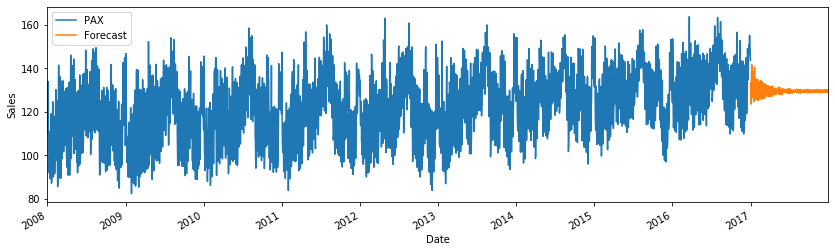

In [137]:
prediction_futur = model_fit.get_forecast(steps = 365)
prediction_ic = prediction_futur.conf_int()
nouvel_index = pd.date_range(start='2016-12-31',end='2017-12-31')
prediction_futur = prediction_futur.predicted_mean
prediction_futur.index = pd.date_range(start='2016-12-31',end='2017-12-30')
ax = df1.plot(label='observed', figsize=(14, 4))
prediction_futur.plot(ax=ax, label='Forecast')
ax.fill_between(prediction_ic.index,
                prediction_ic.iloc[:, 0],
                prediction_ic.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

Date
2014-04-22    104.949184
2014-04-23    100.012630
2014-04-24    104.172660
2014-04-25    113.086636
2014-04-26    115.448735
                 ...    
2016-12-27    119.054422
2016-12-28    121.683959
2016-12-29    125.356874
2016-12-30    128.113703
2016-12-31    122.447482
Name: lower PAX, Length: 985, dtype: float64

In [63]:
pred.predicted_mean

Date
2014-04-22    104.949184
2014-04-23    100.012630
2014-04-24    104.172660
2014-04-25    113.086636
2014-04-26    115.448735
                 ...    
2016-12-27    119.054422
2016-12-28    121.683959
2016-12-29    125.356874
2016-12-30    128.113703
2016-12-31    122.447482
Name: lower PAX, Length: 985, dtype: float64